In [3]:
import sys
print(sys.executable)

/home/ashish/anaconda3/bin/python


In [50]:
import numpy as np
from wordcloud import WordCloud as wcl
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [5]:
df = pd.read_csv(r"1377884570_tweet_global_warming.csv", encoding ="latin-1") 

In [42]:
df.tail()

,tweet,existence,confidence,other1,other2,other3
6053,That's why he removed the data that disagreed ...,No,0.6718,NaN,NaN,NaN
6056,Climate Change Fraud - Global warming: It has ...,No,1,NaN,NaN,NaN
6087,Global warming you tube parody you will enjoy ...,No,0.6411,NaN,NaN,NaN
6088,One-Eyed Golfer: Don't dare tell me about glob...,No,1,NaN,NaN,NaN
6089,man made global warming a hair brained theory ...,No,1,NaN,NaN,NaN


In [43]:
df=df.replace(to_replace ="Y", value ="Yes") 

In [44]:
df=df.replace(to_replace ="N", value ="No") 

In [45]:
y1 = df[df.existence == 'Yes']

In [46]:
n1 = df[df.existence =='No']

In [47]:
n2 = df[df.existence =='NA']

In [48]:
y1.tail()

,tweet,existence,confidence,other1,other2,other3
6080,"Bats, Birds and Lizards Can Fight Climate Chan...",Yes,0.6751,NaN,NaN,NaN
6081,"Bats, Birds and Lizards Can Fight Climate Chan...",Yes,1,NaN,NaN,NaN
6082,Global warming: The fossil fuel dilemma: Ameri...,Yes,1,NaN,NaN,NaN
6084,It's 83ï¿½_ï¿½ and climbing in NYC. August wea...,Yes,1,NaN,NaN,NaN
6085,"@bloodless_coup ""The phrase 'global warming' s...",Yes,1,NaN,NaN,NaN


In [49]:
d1=pd.concat([y1,n1])
df=pd.concat([d1,n2])

In [51]:
def word_cloud(words):
    stopwords = set(STOPWORDS)
    wordcloud = wcl(max_words=204,width = 603, height = 603,background_color ='black', stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    plt.figure(figsize = (9, 9), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [52]:
def extract_words(tweets):
    distinct_words = ' ' 
    for tweet in tweets: 
        tweet = str(tweet)
        tokens = tweet.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        for words in tokens: 
            distinct_words = distinct_words + words + ' '
    return distinct_words

  

In [36]:
unique_wrds = extract_words(df.tweet)

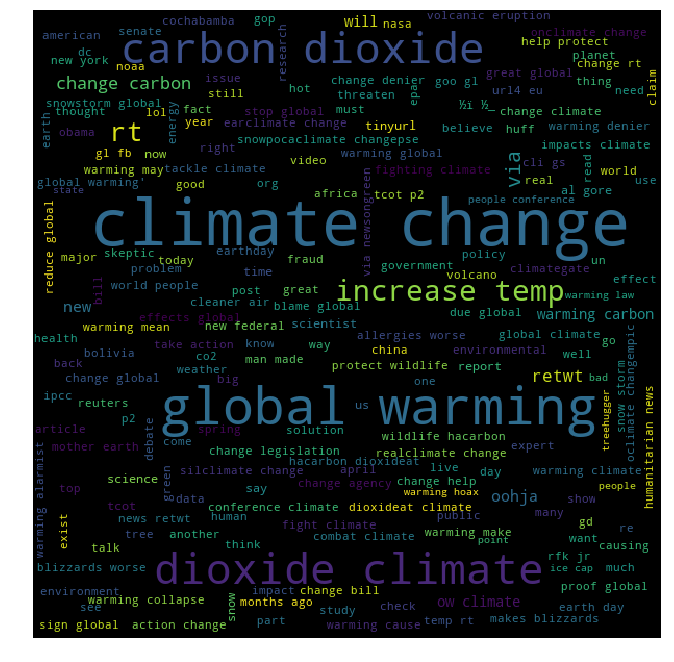

In [53]:
word_cloud(unique_wrds)

# Fossil Fuels

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
with open('Fossil-fuel co2 Global Estimates (1751-2013).csv') as f:
    df = pd.read_csv(f)

In [22]:
df.tail()

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita
258,2009,8641,1580,3065,3517,415,64,1.26
259,2010,9137,1700,3129,3795,448,66,1.32
260,2011,9508,1762,3158,4027,496,64,1.36
261,2012,9671,1787,3214,4086,520,65,1.36
262,2013,9776,1806,3216,4131,554,68,1.36


In [23]:
def plot_CO2_emission(feature1,feature2,name,col='blue'):
    sns.regplot(x=feature1, y=feature2,color=col ,lowess=True,label=name)
    plt.title("CO2 Emissions from Fossil Fuel's via Cement Manufacture, and Gas Flaring: 1751-2013 ", size=18)
    plt.ylabel("CO2 emission ( "+name+" )", size=15)
    plt.xlabel("Year", size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend()
    plt.show()

In [24]:
def plot_CO2_emission_all(feature1,feature2,name):
    sns.regplot(x=feature1, y=feature2,lowess=True,label=name)
    plt.title("CO2 Emissions from Fossil Fuel's via Cement Manufacture, and Gas Flaring: 1751-2013 ", size=18)
    plt.ylabel("CO2 emission ( "+name+" )", size=15)
    plt.xlabel("Year", size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend()
    

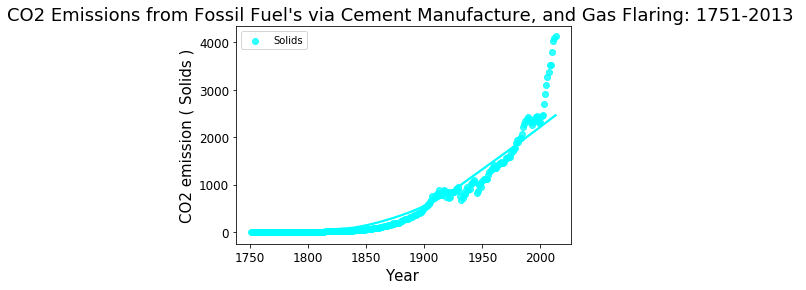

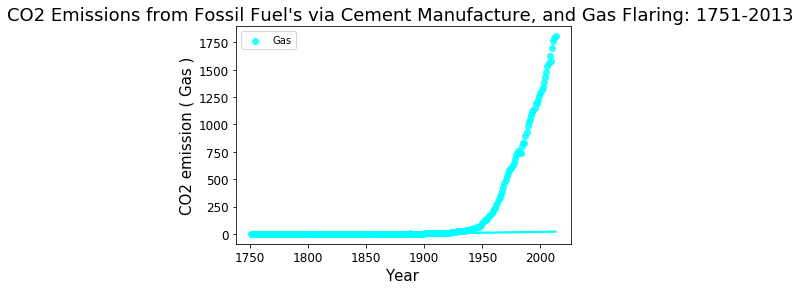

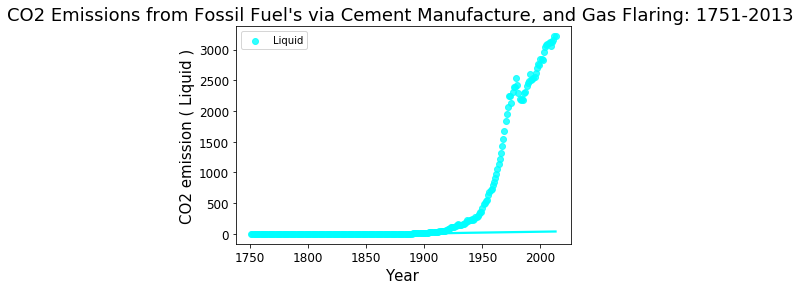

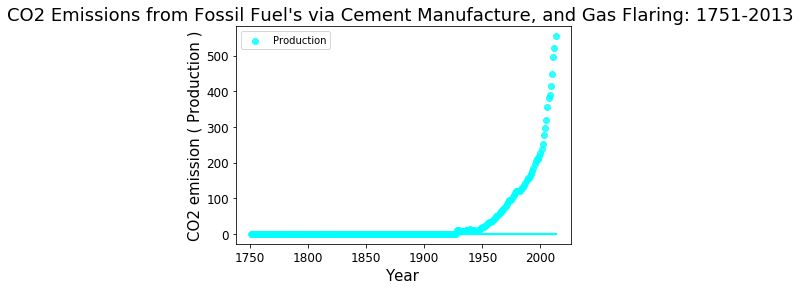

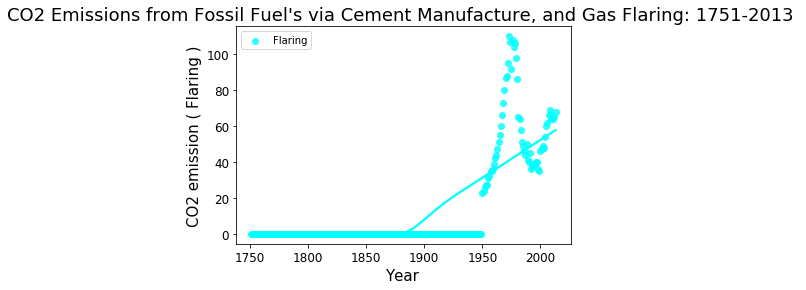

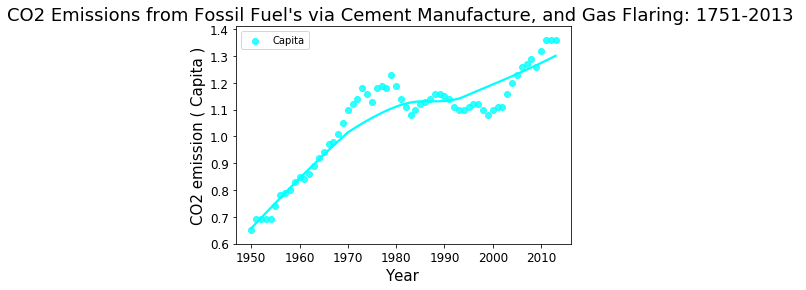

In [25]:
plot_CO2_emission(df.Year,df.Solids,'Solids','cyan')
plot_CO2_emission(df.Year,df.Gas,'Gas','cyan')
plot_CO2_emission(df.Year,df.Liquids,'Liquid','cyan')
plot_CO2_emission(df.Year,df.Production,'Production','cyan')
plot_CO2_emission(df.Year,df.Flaring,'Flaring','cyan')
plot_CO2_emission(df.Year,df.Capita,'Capita','cyan')

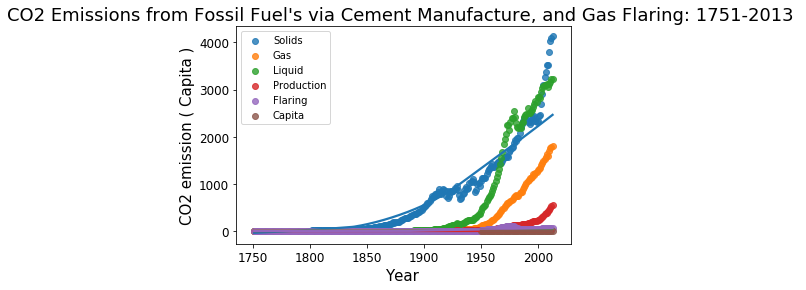

In [26]:
plot_CO2_emission_all(df.Year,df.Solids,'Solids')
plot_CO2_emission_all(df.Year,df.Gas,'Gas')
plot_CO2_emission_all(df.Year,df.Liquids,'Liquid')
plot_CO2_emission_all(df.Year,df.Production,'Production')
plot_CO2_emission_all(df.Year,df.Flaring,'Flaring')
plot_CO2_emission_all(df.Year,df.Capita,'Capita')

In [27]:
df.keys()

Index(['Year', 'Total', 'Gas', 'Liquids', 'Solids', 'Production', 'Flaring',
       'Capita'],
      dtype='object')

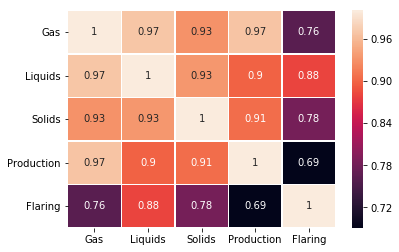

In [28]:
sns.heatmap(df.drop(['Capita','Year','Total'],axis=1).corr(),linecolor='white',linewidths=0.4,annot=True)